In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [4]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([1, 4, 3, 2])

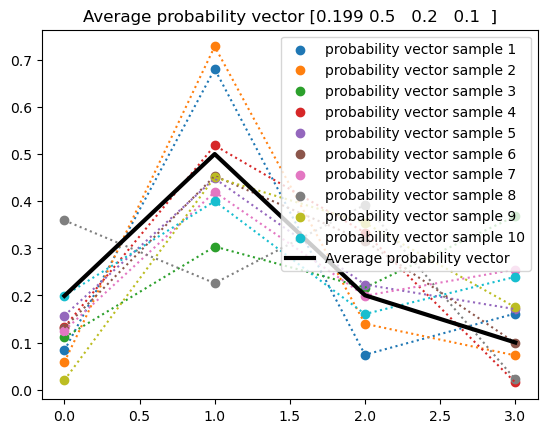

In [5]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Initial State at t=0: The vector $\mathbf{x}^{(0)}$ would consist of zeros across all $k$ positions, reflecting the starting point of sales tracking.

Sales Accumulation: As customers make purchases, the vector $\mathbf{x}^{(t)}$ accumulates counts corresponding to the brands chosen, with the $i$-th element of $\mathbf{x}^{(t)}$ increasing by 1 for each purchase of the $i$-th brand.

Probability Vector Influence: The probability vector $\mathbf{p}$, which is assumed to follow a multinomial distribution, influences the rate at which each brand's count increases. A higher $p_i$ implies a greater likelihood of the $i$-th brand being purchased, hence, over time, brands with higher probabilities will tend to have higher counts in $\mathbf{x}^{(t)}$.

Long-Term Behavior: Assuming stable customer preferences, as time progresses and $t$ increases, the proportion of counts in $\mathbf{x}^{(t)}$ for each brand will tend to align with the probability vector $\mathbf{p}$, following the law of large numbers.

Best-Selling Brand: The brand with the highest count in $\mathbf{x}^{(t)}$ at a given time could be considered the "best" in terms of sales volume up to that time.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


In Bayesian terms, the belief about the "best chips" at time t is captured by the posterior distribution $p(\mathbf p | \mathbf x^{(t)})$, which is a Dirichlet distribution. This distribution updates the prior parameter vector 
α with the observed sales data $\mathbf x^{(t)}$, resulting in a new parameter vector α+$\mathbf x^{(t)}$, reflecting our updated beliefs about the probability vector p of the chip brands.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [9]:
alpha = np.array([1, 1, 1, 1])
x_t = np.array([2, 5, 2, 1])   

alpha_posterior = alpha + x_t

sample = np.random.dirichlet(alpha_posterior, size=1)

j = 1
p_j_given_x_t = sample[0][j-1] 

p_j_given_x_t

0.34657166887819846

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [10]:
alpha = np.array([1, 1, 1, 1])  
x_t = np.array([2, 5, 2, 1])   
q = 0.3
j = 1 
alpha_posterior = alpha + x_t

samples = np.random.dirichlet(alpha_posterior, size=100000)

probability_estimate = (samples[:, j-1] > q).mean()

probability_estimate


0.20253

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [11]:
interval = np.percentile(samples[:, j-1], [2.5, 97.5])

interval

array([0.04968935, 0.45600595])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [12]:
j_prime = 2  
probability_estimate_j_greater_j_prime = (samples[:, j-1] > samples[:, j_prime-1]).mean()

probability_estimate_j_greater_j_prime

0.14432

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [13]:
ratios = samples[:, j-1] / samples[:, j_prime-1]

interval_ratio = np.percentile(ratios, [2.5, 97.5])

interval_ratio

array([0.09206029, 1.88420354])

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

In [14]:
differences = samples[:, j-1] - samples[:, j_prime-1]

interval_difference = np.percentile(differences, [2.5, 97.5])

interval_difference

array([-0.58677226,  0.1952765 ])

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


Both $p\left(\frac{p_j}{p_{j'}} | \mathbf{x}^{(t)}\right)$ and $p\left(p_j - p_{j'} | \mathbf{x}^{(t)} \right)$ are relevant because they quantify relative and absolute differences in brand preferences, respectively. For (j,j')=(2,3), differences are subtle, impacting choice subtly. For (j,j')=(4,5), despite similar absolute differences, the relative ratio significantly impacts perceived preference due to the small base probabilities.


10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


To accurately examine $p\left(\frac{p_4}{p_{5}} | \mathbf{x}^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf{x}^{(t)} \right)$ given $p_4$ and $p_5$ are very close, t must be large. This allows sufficient data to accurately reflect these small differences, adhering to the law of large numbers.
